<a href="https://colab.research.google.com/github/thyeaditungson29/myDataScience/blob/main/Tugas_KSDrev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [504]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

#cross validation
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', None)

#warning handle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [505]:
#Menghubungkan Google Colabs dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [506]:
#Definisi Path dari data di Google Drive dan Mount Data
tr_path = "/content/drive/MyDrive/train_proj.csv"
te_path = "/content/drive/MyDrive/test_proj.csv"
tr_df = pd.read_csv(tr_path, index_col = 'id')
te_df = pd.read_csv(te_path, index_col = 'id')

In [507]:
#Melihat 5 data pertama dari Data train
tr_df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [508]:
#Melihat 5 data pertama dari Data train
tr_df.tail(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [509]:
# Melihat tipe dari setiap data
tr_df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [510]:
# Melihat jumlah data, mean, deviasi max, dan min dari tiap variabel
tr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [511]:
#melihat apakah variabel yang terdapat missing value dengan mengecek apakah ada variabel dengan Non-Null Count yang berbeda
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


Male      206089
Female    175020
Name: Gender, dtype: int64


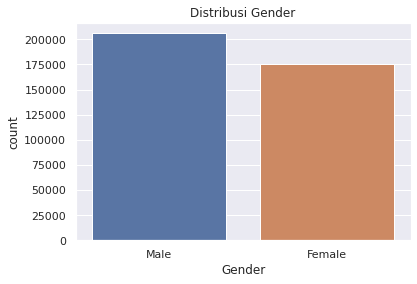

In [512]:
#melihat sebaran data pada tiap variabel dengan diagram
#Distribusi Data pada Gender
print(tr_df['Gender'].value_counts())
sns.countplot(tr_df['Gender']).set_title('Distribusi Gender')
plt.show()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64


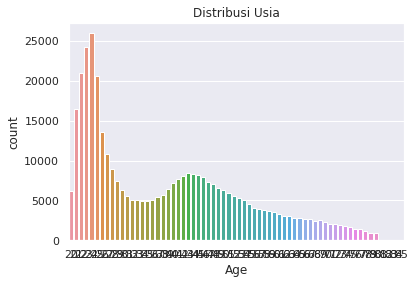

In [513]:
#Distribusi Data pada Age
print(tr_df['Age'].value_counts())
sns.countplot(tr_df['Age']).set_title('Distribusi Usia')
plt.show()

1    380297
0       812
Name: Driving_License, dtype: int64


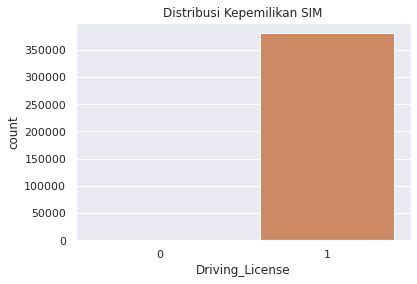

In [514]:
#Distribusi Data pada Driving_License
print(tr_df['Driving_License'].value_counts())
sns.countplot(tr_df['Driving_License']).set_title('Distribusi Kepemilikan SIM')
plt.show()

0    206481
1    174628
Name: Previously_Insured, dtype: int64


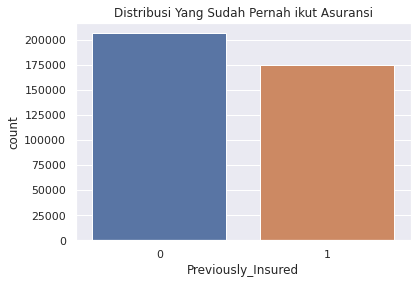

In [515]:
#Distribusi Data pada Yang Sudah Pernah ikut Asuransi
print(tr_df['Previously_Insured'].value_counts())
sns.countplot(tr_df['Previously_Insured']).set_title('Distribusi Yang Sudah Pernah ikut Asuransi')
plt.show()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


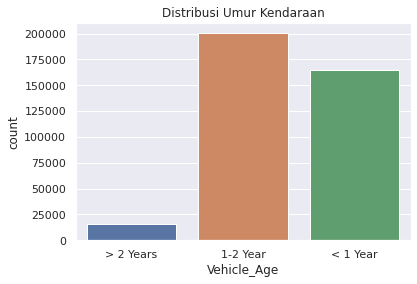

In [516]:
#Distribusi Data pada Umur Kendaraan
print(tr_df['Vehicle_Age'].value_counts())
sns.countplot(tr_df['Vehicle_Age']).set_title('Distribusi Umur Kendaraan')
plt.show()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


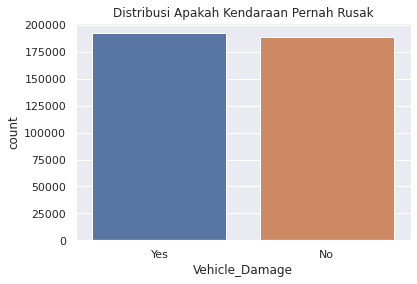

In [517]:
#Distribusi Data pada Apakah Kendaraan Pernah Rusak
print(tr_df['Vehicle_Damage'].value_counts())
sns.countplot(tr_df['Vehicle_Damage']).set_title('Distribusi Apakah Kendaraan Pernah Rusak')
plt.show()

0    334399
1     46710
Name: Response, dtype: int64


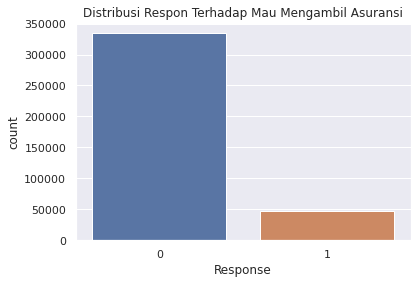

In [518]:
#Distribusi Data pada Respon Terhadap Asuransi
print(tr_df['Response'].value_counts())
sns.countplot(tr_df['Response']).set_title('Distribusi Respon Terhadap Mau Mengambil Asuransi')
plt.show()

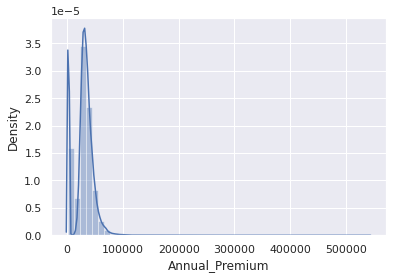

In [519]:
# Melihat Distribusi dari Premi Tahunan di data Train
sns.distplot(tr_df.Annual_Premium)

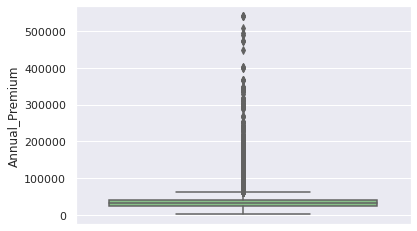

In [520]:
sns.boxplot(y = 'Annual_Premium', data = tr_df,palette='Accent')

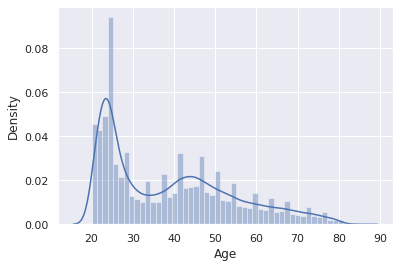

In [521]:
# Melihat Distribusi dari Umur di data Train
sns.distplot(te_df.Age)

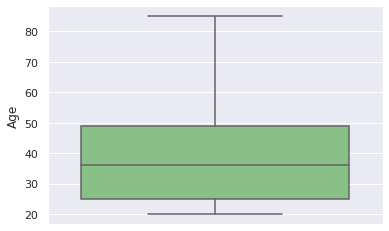

In [522]:
sns.boxplot(y = 'Age', data = te_df,palette='Accent')

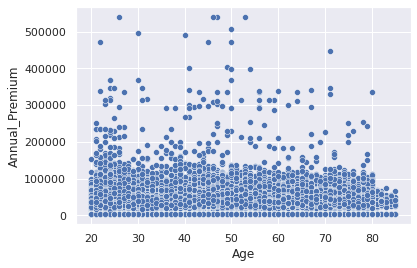

In [523]:
# Distribusi Umur VS Premi Tahunan
sns.scatterplot(x=tr_df['Age'],y=tr_df['Annual_Premium'])

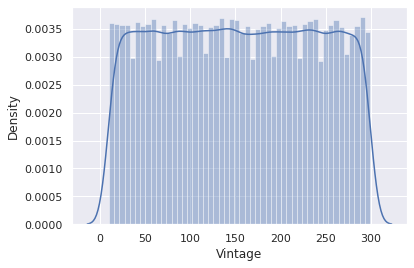

In [524]:
# Melihat Distribusi dari Vintage di data Train
sns.distplot(te_df.Vintage)

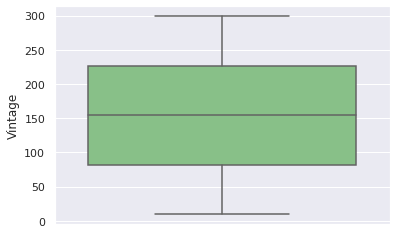

In [525]:
sns.boxplot(y = 'Vintage', data = te_df,palette='Accent')

In [526]:
# Sekarang Kita masuk ke data Pre Processing
# Dari data numerik yang kita miliki (Age, Vintage, dan Annual Premium) hanya Annual Premium yang memiliki penyimpangan
# Yang pertama kita melakukan standarisasi ke Premi Tahunan karena terdapat beberapa outlier pada data ini, terlihat dari box plot Premi tahunan di atas
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
num_feat = ['Age','Vintage']
tr_df[num_feat] = ss.fit_transform(tr_df[num_feat])
te_df[num_feat] = ss.fit_transform(te_df[num_feat])

mm = MinMaxScaler()
tr_df[['Annual_Premium']] = mm.fit_transform(tr_df[['Annual_Premium']])
te_df[['Annual_Premium']] = mm.fit_transform(te_df[['Annual_Premium']])

In [527]:
#Melihat Korelasi Dari Tabel
corr = tr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.00,-0.08,0.04,-0.25,0.07,-0.58,-0.00,0.11
Driving_License,-0.08,1.00,-0.00,0.01,-0.01,0.04,-0.00,0.01
Region_Code,0.04,-0.00,1.00,-0.02,-0.01,-0.04,-0.00,0.01
Previously_Insured,-0.25,0.01,-0.02,1.00,0.00,0.22,0.00,-0.34
Annual_Premium,0.07,-0.01,-0.01,0.00,1.00,-0.11,-0.00,0.02
Policy_Sales_Channel,-0.58,0.04,-0.04,0.22,-0.11,1.00,0.00,-0.14
Vintage,-0.00,-0.00,-0.00,0.00,-0.00,0.00,1.00,-0.00
Response,0.11,0.01,0.01,-0.34,0.02,-0.14,-0.00,1.00


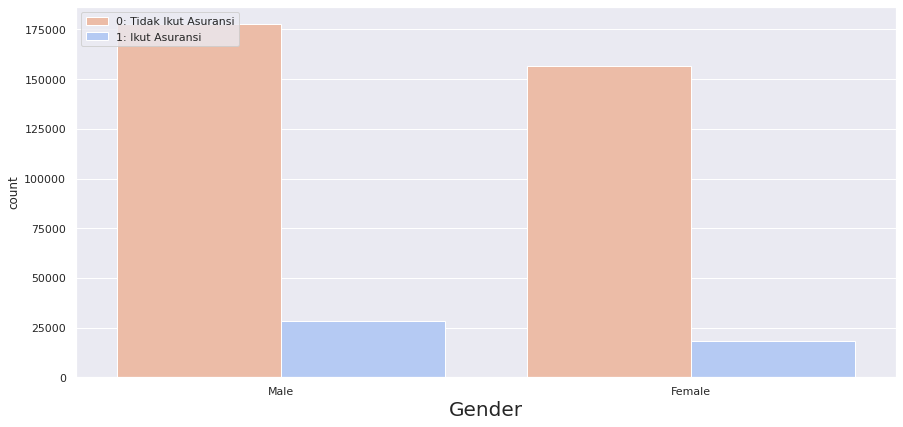

In [528]:
#Hubungan Tiap Gender dengan Response
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Gender" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Gender", fontsize=20)
plt.legend(("0: Tidak Ikut Asuransi", "1: Ikut Asuransi"),loc='upper left')

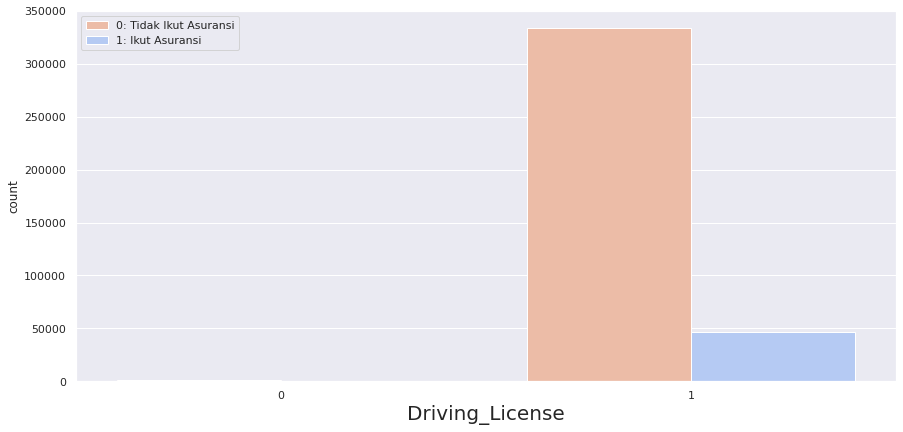

In [529]:
#Hubungan Pemilikan SIM dengan Response
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Driving_License" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Driving_License", fontsize=20)
plt.legend(("0: Tidak Ikut Asuransi", "1: Ikut Asuransi"),loc='upper left')

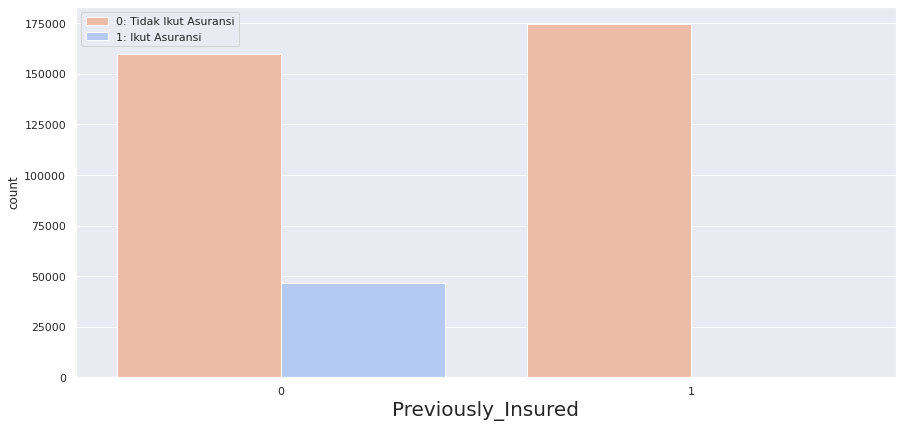

In [530]:
#Hubungan Yang Sudah Ikut Asuransi dengan Response
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Previously_Insured" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Previously_Insured", fontsize=20)
plt.legend(("0: Tidak Ikut Asuransi", "1: Ikut Asuransi"),loc='upper left')

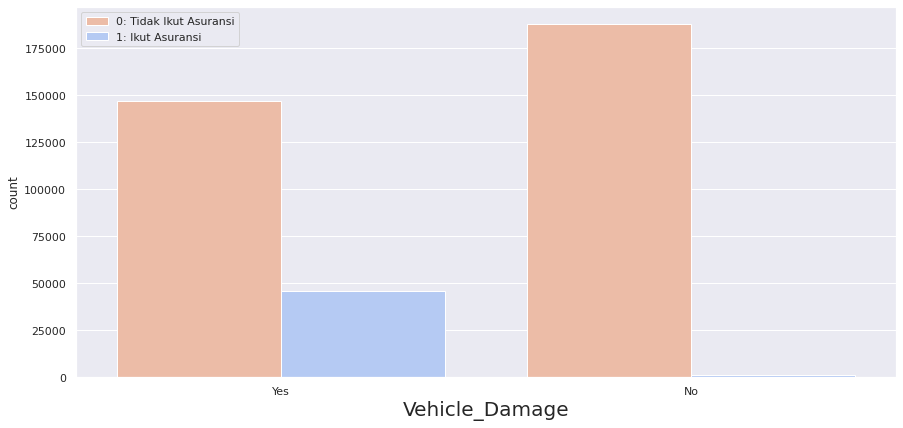

In [531]:
#Hubungan Kerusakan Kendaraan dengan Response
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Vehicle_Damage" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Vehicle_Damage", fontsize=20)
plt.legend(("0: Tidak Ikut Asuransi", "1: Ikut Asuransi"),loc='upper left')

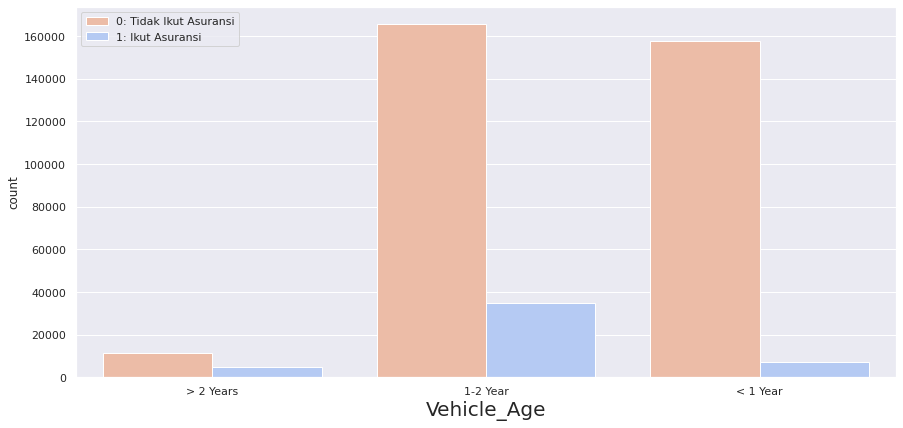

In [532]:
#Hubungan Umur Kendaraan dengan Response
plt.figure(figsize=(50,15))
plt.subplot(2,3,1)
sns.countplot(x="Vehicle_Age" ,hue='Response', data=tr_df ,palette='coolwarm_r')
plt.xlabel("Vehicle_Age", fontsize=20)
plt.legend(("0: Tidak Ikut Asuransi", "1: Ikut Asuransi"),loc='upper left')

In [533]:
# Setelah data kita preprocessing, kita lihat kembali informasinya
print(tr_df.info())
print(te_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  float64
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  float64
 10  Response              381109 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 43.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127037 entries, 381110 to 508146
Data columns (total 11 columns):
 #   Column                No

In [534]:
# Sekarang kita akan mengubah Variabel yang sifatnya Object dan Kategorik kedalam bentuk Integer
#lable encoding

#one hot encoding
cols = ['Gender', 'Vehicle_Age','Vehicle_Damage']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(tr_df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(te_df[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = tr_df.index
te_oh.index = te_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([tr_df, tr_oh], axis=1)
te_fe = pd.concat([te_df, te_oh], axis=1)

tr_fe = tr_fe.drop(cols, axis = 1)
te_fe = te_fe.drop(cols, axis = 1)

print(tr_fe.info())
print(te_fe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    381109 non-null  float64
 1   Driving_License        381109 non-null  int64  
 2   Region_Code            381109 non-null  float64
 3   Previously_Insured     381109 non-null  int64  
 4   Annual_Premium         381109 non-null  float64
 5   Policy_Sales_Channel   381109 non-null  float64
 6   Vintage                381109 non-null  float64
 7   Response               381109 non-null  int64  
 8   Gender_Female          381109 non-null  int64  
 9   Gender_Male            381109 non-null  int64  
 10  Vehicle_Age_1-2 Year   381109 non-null  int64  
 11  Vehicle_Age_< 1 Year   381109 non-null  int64  
 12  Vehicle_Age_> 2 Years  381109 non-null  int64  
 13  Vehicle_Damage_No      381109 non-null  int64  
 14  Vehicle_Damage_Yes     381109 non-nu

In [535]:
# Menerapkan Model Machine Learning
y = tr_fe['Response']
X = tr_fe.drop('Response', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)

In [536]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

index = ['Valid1','Valid2','Valid3','Valid4','Valid5']
scoring = ['accuracy','precision', 'recall','f1']

In [537]:
#model 2 Dengan Regresi Logistik
LR = LogisticRegression()
#cross validation
LR_report = pd.DataFrame(cross_validate(LR, X, y, scoring=scoring))
#getting required score methods
LR_report = LR_report.iloc[:,2:]
#naming the columns
LR_report.columns = scoring
#naming the index
LR_report.index = index

#final result collection
model_2 = []

#Classification report
print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_2.append(round(LR_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.877266   0.066667  0.000107  0.000214
Valid2  0.877175   0.045455  0.000107  0.000214
Valid3  0.877214   0.000000  0.000000  0.000000
Valid4  0.876965   0.108696  0.000535  0.001065
Valid5  0.877160   0.137931  0.000428  0.000854 


Mean Scores:

	accuracy: 0.8772
	precision: 0.0717
	recall: 0.0002
	f1: 0.0005


In [538]:
#model
RF = RandomForestClassifier()
#cross validation
RF_report = pd.DataFrame(cross_validate(RF, X, y, scoring=scoring))
#getting required score methods
RF_report = RF_report.iloc[:,2:]
#naming the columns
RF_report.columns = scoring
#naming the index
RF_report.index = index

#final result collection
model_3 = []

#Classification report
print("Clasification report:\n")
print(RF_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(RF_report[score].mean(),4)}")
    model_3.append(round(RF_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.864567   0.349770  0.122244  0.181169
Valid2  0.867112   0.376219  0.128024  0.191039
Valid3  0.865721   0.359812  0.122672  0.182965
Valid4  0.865984   0.359057  0.119032  0.178793
Valid5  0.865470   0.356333  0.121066  0.180729 


Mean Scores:

	accuracy: 0.8658
	precision: 0.3602
	recall: 0.1226
	f1: 0.1829


In [539]:
Models = pd.DataFrame({
    'Logistic Regression': np.array(model_2),
    'Random Forest': np.array(model_3)})
Models.index = scoring
Models

,Logistic Regression,Random Forest
accuracy,0.8772,0.8658
precision,0.0717,0.3602
recall,0.0002,0.1226
f1,0.0005,0.1829


In [540]:
LR.fit(X,y)
X_test = te_fe.drop("Response", axis = 1)
te_fe["Response"] = LR.predict(X_test)
te_fe["Response"] = te_fe["Response"].apply(lambda x: "will not buy insurance" if x==0 else "will buy insurance")
te_fe["Response"].value_counts()

will not buy insurance    126966
will buy insurance            71
Name: Response, dtype: int64

In [541]:
RF.fit(X,y)
X_test = te_fe.drop("Response", axis = 1)
te_fe["Response"] = RF.predict(X_test)
te_fe["Response"] = te_fe["Response"].apply(lambda x: "will not buy insurance" if x==0 else "will buy insurance")
te_fe["Response"].value_counts()

will not buy insurance    121634
will buy insurance          5403
Name: Response, dtype: int64